# Introduction To Data Science – Assignment 2

---

#### Sections A – B – C – D

---

##***Instructions: Read These Carefully Before Starting!***

1. Due Date: Thursday 20th October 2022 – 11:59PM

2. **Name the file in the format Lyyxxxx_A2.ipynb and save it as .ipynb (e.g. L216666_A2.ipynb)**

3. Submission will be taken on Google Classroom (**submit SINGLE .ipynb file ONLY**)

4. **Assignment will not be evaluated if**:

> * You submit python (.py) files
> * You submit multiple .ipynb files
> * You submit compressed (.rar or .zip) files

5. **Work in the spaces provided and do not delete/modify any cells from this template.**

6. Upload data files directly to Google Colab - do not use Google Drive or GitHub linking method

*Not following these instructions will lead to mark deduction.*

---

All source files needed to complete this assignment can be found on the following [Google Drive link](https://drive.google.com/drive/folders/1qBib_6ZOhvHb73ZRLWiCMWl9NFyU1IDO?usp=sharing). Download these files and upload them to your Google Colab Notebook. 

**Do not link Google Drive or GitHub with Colab.**

**Do not add these files with your submission on Google Classroom.**

---

Happy Coding 🌺

---

TA Emails

Section A, C - Muhammad Maarij l192347@lhr.nu.edu.pk

Section B, D - Hira Ijaz l192377@lhr.nu.edu.pk

---

---
## Question 0

Add all library imports here

In [2]:
import pandas as pd
import numpy as np
import seaborn as seabornInstance
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.datasets import load_wine 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


ModuleNotFoundError: No module named 'pandas'

---
## Question 1

####Single Linear Regression with Gradient Descent

> Take help from slides 26 and 30
---

**Part A -**
Write a function that calculates and returns value for hypothesis $h_\theta(x)$

In [42]:
# complete this function implementation
def hypothesis(x, theta):
   hypothesis = theta[0]+theta[1]*x
   return hypothesis


**Part B -**
Write a function that calculates and returns value for loss/cost $J(\theta_0, \theta_1)$

In [43]:
# complete this function implementation
def loss(hypothesis_x, y):
 m= len(hypothesis_x)
 #slope=len(hypothesis(x,theta))
 j = (1/2*m)*np.sum((hypothesis_x -y)**2) # cost
 return j


**Part C-**
Write a function that applies the gradient descent algorithm and updates values of $\theta_0$ and $\theta_1$ until they converge.

* take default vaue of $α$ to be 0.015
* take default number of iterations to be 15000
* print loss after every 500 iterations

In [44]:
 # complete this function implementation

def gradientDescent(x, y, theta, numIterations=15000, alpha=0.015):
  i =0
  m=len(x)
#cost function
  while(i<numIterations):
      y_predicted=hypothesis(x,theta)
      theta [0]= theta[0] - (alpha)*((1/m)*sum(y_predicted-y))
      theta [1]= theta[1] - (alpha)*((1/m)* (sum((y_predicted-y)*x)))
      i =i+1
      if(i%500==0):
        print(loss(y_predicted,y))

**Part D -**
FactoryRevenue.csv contains information about the number of workers in a factory and the annual profit for that factory. Import the file FactoryRevenue.csv as a Pandas DataSet and print out the information for it.

In [45]:
FactoryRevenue= pd.read_csv("Update_FactoryRevenue.csv")
print(FactoryRevenue.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TotalFactoryWorkers  98 non-null     float64
 1   AnnualProfit         98 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB
None


**Part E -**
Remove rows that have any null values

In [46]:
FactoryRevenue=FactoryRevenue.dropna()
length=(FactoryRevenue.shape[0])
print("total number of rows after deletion of null rows = ",length)
#print(FactoryRevenue.head())

total number of rows after deletion of null rows =  97


**Part F -**

First identify the independant and dependant variables. 

Then create two arrays named x and y and add independant variable data to array x, dependant variable data to array y.

In [47]:
# independant variable:
print("independet variable is =  TotalFactoryWorkers ")

# dependant variable:
print("dependet variable is =  AnnualProfit ")
x= (FactoryRevenue["TotalFactoryWorkers"])
y= (FactoryRevenue["AnnualProfit"])

independet variable is =  TotalFactoryWorkers 
dependet variable is =  AnnualProfit 


**Part G -** 

Create an array called 'theta' that will hold $θ_0$ and $θ_1$. Initalize both values to 0.

Then call the gradientDescent function using array x, array y, and array theta. Do not provide any other input parameters.

Print out the values of y-intercept and slope/gradient

In [48]:
theta = [0,0]
gradientDescent(x,y,theta)
print("SLOPE = ",theta[1])
print("Intercept = ",theta[0])

43031.71565465931
42184.379736652394
42127.86274342569
42124.0930808214
42123.84164571596
42123.824875087164
42123.823756492406
42123.82368188256
42123.823676906104
42123.823676574175
42123.823676552034
42123.823676550564
42123.82367655046
42123.82367655046
42123.82367655046
42123.82367655046
42123.823676550455
42123.823676550455
42123.82367655045
42123.823676550455
42123.82367655046
42123.82367655046
42123.82367655045
42123.82367655045
42123.82367655045
42123.82367655045
42123.82367655045
42123.82367655045
42123.82367655045
42123.82367655045
SLOPE =  1.1930336441895852
Intercept =  -3.895780878311771


**Part H -** Plot a scatter plot and regression line on the same graph

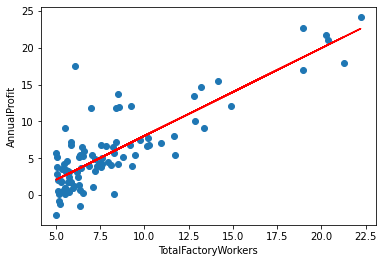

In [49]:
plt.scatter(FactoryRevenue['TotalFactoryWorkers'],FactoryRevenue['AnnualProfit'])
x_c=FactoryRevenue['TotalFactoryWorkers']
y_c=theta[0]+theta[1]*x_c
plt.plot(x_c,y_c,color="red")
plt.xlabel("TotalFactoryWorkers")
plt.ylabel("AnnualProfit")
plt.show()

---
## Question 2

Logistic Regression on Flowers Dataset

---



**Part A** - Load the file FlowersData.csv and describe the dataset

In [50]:
FlowersData= pd.read_csv("FlowersData.csv")
print(FlowersData.head())
FlowersData.describe()


   sepal_length  sepal_width  petal_length  petal_width flower_name
0           5.1          3.5           1.4          0.2    hibiscus
1           4.9          3.0           1.4          0.2    hibiscus
2           4.7          3.2           1.3          0.2    hibiscus
3           4.6          3.1           1.5          0.2    hibiscus
4           5.0          3.6           1.4          0.2    hibiscus


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Part B** - Split data into training and test data using SKLearn train_test_split. Specify parameter test_size to be 25%

Hint: You will be needing 4 arrays: X_train, X_test, y_train, y_test

In [51]:
featurecall=['sepal_length','sepal_width','petal_length','petal_width']
x= FlowersData[featurecall]
y= FlowersData['flower_name'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,shuffle=True)
print("\n X_train \n",x_train.head())
print("\n")
print(" y_train ")
print( y_train)
print("\n")
print("\nx_test \n")
print(x_test.head())
print("\n")
print("\ny_test \n")
print(y_test)
print("\n")
#print(y)



 X_train 
      sepal_length  sepal_width  petal_length  petal_width
64            5.6          2.9           3.6          1.3
12            4.8          3.0           1.4          0.1
129           7.2          3.0           5.8          1.6
126           6.2          2.8           4.8          1.8
30            4.8          3.1           1.6          0.2


 y_train 
['daffodil' 'hibiscus' 'lily' 'lily' 'hibiscus' 'hibiscus' 'daffodil'
 'daffodil' 'lily' 'lily' 'daffodil' 'hibiscus' 'hibiscus' 'daffodil'
 'lily' 'lily' 'daffodil' 'hibiscus' 'lily' 'daffodil' 'daffodil' 'lily'
 'lily' 'hibiscus' 'lily' 'hibiscus' 'lily' 'hibiscus' 'daffodil'
 'hibiscus' 'hibiscus' 'lily' 'daffodil' 'lily' 'hibiscus' 'hibiscus'
 'hibiscus' 'lily' 'lily' 'hibiscus' 'lily' 'lily' 'lily' 'hibiscus'
 'hibiscus' 'lily' 'lily' 'lily' 'daffodil' 'hibiscus' 'hibiscus'
 'hibiscus' 'lily' 'daffodil' 'lily' 'daffodil' 'daffodil' 'hibiscus'
 'lily' 'daffodil' 'daffodil' 'daffodil' 'lily' 'hibiscus' 'hibiscus'
 'da

**Part C** - Perform scaling on the X_test and X_train values using StandardScacler from SKLearn Library

In [52]:

scaler=StandardScaler()
#print(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)



**Part D** - Train Model using SKLearn LogisticRegression

In [53]:
logistic_model = LogisticRegression(solver='liblinear')
logistic_model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

**Part E** - Predict Labels for test split

In [54]:
y_pred = logistic_model.predict(x_test)
print(y_pred)

['hibiscus' 'lily' 'lily' 'daffodil' 'hibiscus' 'daffodil' 'hibiscus'
 'lily' 'daffodil' 'daffodil' 'hibiscus' 'hibiscus' 'lily' 'hibiscus'
 'hibiscus' 'lily' 'lily' 'daffodil' 'lily' 'lily' 'daffodil' 'lily'
 'lily' 'hibiscus' 'hibiscus' 'daffodil' 'lily' 'hibiscus' 'lily'
 'hibiscus' 'hibiscus' 'hibiscus' 'hibiscus' 'daffodil' 'daffodil'
 'hibiscus' 'lily' 'lily']


---
## Question 3

Confusion Matrix Construction

---

**Part A** - Using the prediction result of logistic regression (Question 2) construct a confusion matrix using SKLearn confusion_matrix

Print out this confusion matrix

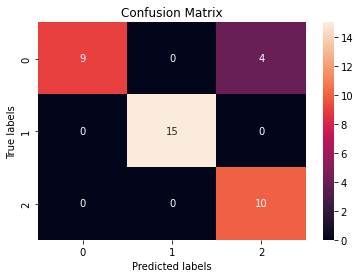

In [55]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 


**Part B** - Calculate and print Accuracy

In [56]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy is",accuracy)

Accuracy is 0.8947368421052632


**Part C** - Calculate and print Recall

In [57]:
recall = recall_score(y_test, y_pred, average=None)
print("RECALL in percentage ", recall)

RECALL in percentage  [0.69230769 1.         1.        ]


**Part D** - Calculate and print Precision

In [58]:
precision = precision_score(y_test, y_pred,average=None)
print("Precision: ",precision)

Precision:  [1.         1.         0.71428571]


**Part E** - Calculate and print $𝐹_1$ Score

In [59]:
f1 = f1_score(y_test, y_pred,average=None)
print("F1 score: ", f1)

F1 score:  [0.81818182 1.         0.83333333]
